In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# step 1: Reading the dataset

In [16]:
df = pd.read_csv("housing_dataset.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size_sqft           10000 non-null  float64
 1   Bedrooms            10000 non-null  float64
 2   Bathrooms           10000 non-null  float64
 3   YearBuilt           10000 non-null  float64
 4   Price               10000 non-null  float64
 5   Location_City       10000 non-null  float64
 6   Location_Rural      10000 non-null  float64
 7   Location_Suburb     10000 non-null  float64
 8   HouseAge            10000 non-null  float64
 9   Rooms_per_1000sqft  10000 non-null  float64
 10  Size_per_Bedroom    10000 non-null  float64
 11  Is_City             10000 non-null  float64
 12  LogPrice            10000 non-null  float64
dtypes: float64(13)
memory usage: 1015.8 KB


In [18]:
df.head()

,Size_sqft,Bedrooms,Bathrooms,YearBuilt,Price,Location_City,Location_Rural,Location_Suburb,HouseAge,Rooms_per_1000sqft,Size_per_Bedroom,Is_City,LogPrice
0,1.030281,-1.463643,0.088986,-1.279342,812100.0,1.0,0.0,0.0,1.279342,-1.061465,3.123085,1.0,13.607380
1,-0.482463,-1.463643,1.347506,1.326476,547000.0,1.0,0.0,0.0,-1.326476,-0.265637,1.309520,1.0,13.212206
2,0.468877,0.007430,-1.169534,-1.339942,693700.0,1.0,0.0,0.0,1.339942,-0.689547,-0.163970,1.0,13.449796
3,1.079817,0.742966,1.347506,-0.915740,848300.0,1.0,0.0,0.0,0.915740,-0.199111,-0.307614,1.0,13.650991
4,0.788954,1.478502,-1.169534,0.962873,806000.0,0.0,0.0,1.0,-0.962873,-0.311002,-0.610027,0.0,13.599840


In [19]:
df.describe()

,Size_sqft,Bedrooms,Bathrooms,YearBuilt,Price,Location_City,Location_Rural,Location_Suburb,HouseAge,Rooms_per_1000sqft,Size_per_Bedroom,Is_City,LogPrice
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.394230,0.400615,0.389968,0.410301,5.941321e+05,0.466057,0.166882,0.383084,0.430013,0.369402,0.340821,0.466251,13.237489
std,0.604533,0.576283,0.621883,0.577779,1.944710e+05,0.494515,0.365170,0.480039,0.594537,0.843111,0.758089,0.493908,0.351932
min,-1.757691,-1.463643,-1.169534,-1.642944,2.271145e+05,0.000000,0.000000,0.000000,-1.568877,-1.268417,-1.199931,0.000000,12.344979
25%,0.000000,0.000000,0.000000,0.000000,4.196751e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.943977
50%,0.000593,0.018099,0.078784,0.011257,5.902458e+05,0.035680,0.003753,0.020534,0.000000,0.000000,0.000000,0.037231,13.288226
75%,0.800697,0.754465,1.284755,0.990776,7.313426e+05,0.997806,0.020669,0.990658,0.963453,0.320630,0.282514,0.999835,13.506030
max,3.230230,1.604556,1.496011,1.706213,1.210067e+06,1.077352,1.044167,1.075806,1.709212,3.608775,3.253860,1.090367,14.039856


# Distribution of Key Features

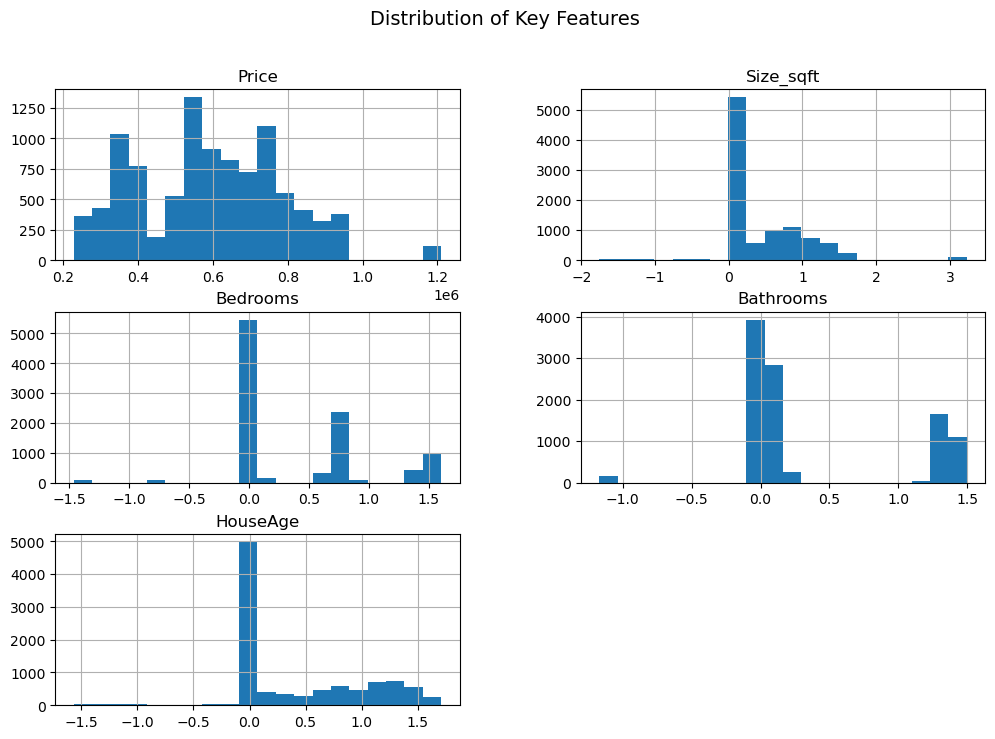

In [20]:
# visualizing on histgram :
df[['Price','Size_sqft','Bedrooms','Bathrooms','HouseAge']].hist(
    figsize=(12,8),
    bins=20
)
plt.suptitle('Distribution of Key Features', fontsize=14)
plt.show()

# 2.2 Correlation Analysis

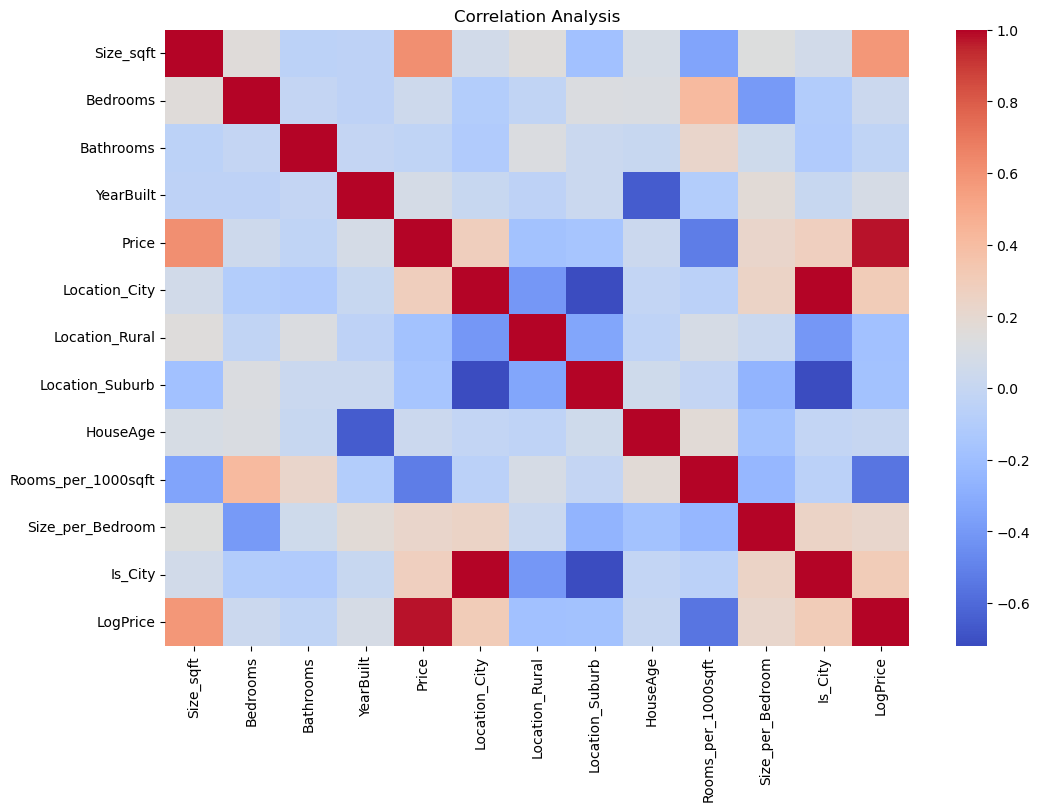

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Analysis")
plt.show()

In [25]:
# The correlation analysis shows that house size, number of bedrooms, and bathrooms have a strong positive relationship with price.  House age has a negative correlation, meaning older houses tend to have lower prices.

# 3 . DATA PREPROCESSING

# 3.1 Handle Missing Values

In [26]:
df.isnull().sum()



# There are no missing values in the dataset; therefore, no imputation was required.

Size_sqft             0
Bedrooms              0
Bathrooms             0
YearBuilt             0
Price                 0
Location_City         0
Location_Rural        0
Location_Suburb       0
HouseAge              0
Rooms_per_1000sqft    0
Size_per_Bedroom      0
Is_City               0
LogPrice              0
dtype: int64

# 3.2 Remove Duplicate Records

In [28]:
df.duplicated().sum()

np.int64(8000)

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
# Duplicate records were checked and removed to ensure data consistency.

# 3.3 Handle Outliers

In [31]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Price'] >= Q1 - 1.5 * IQR) &
        (df['Price'] <= Q3 + 1.5 * IQR)]


In [32]:
# Outliers were detected and removed using the Interquartile Range (IQR) method. This helped reduce the impact of extreme house prices on model performance.

# 3.4 Feature & Target Separation

In [33]:
X = df.drop('Price', axis=1)
y = df['Price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
# The dataset was split into training (80%) and testing (20%) sets to evaluate the model on unseen data.

# 4.2 Train Multiple Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# A Multiple Linear Regression model was trained using the training dataset to learn the relationship between independent variables and house prices.

# 4.3 Model Coefficients (Optional – extra marks)

In [39]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coeff_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
11,LogPrice,527825.337747
0,Size_sqft,27666.809530
8,Rooms_per_1000sqft,13921.991443
7,HouseAge,6756.493979
9,Size_per_Bedroom,3848.131661
3,YearBuilt,3503.808133
2,Bathrooms,-5036.834186
1,Bedrooms,-8473.970983
4,Location_City,-34466.630455
10,Is_City,-50672.866892


# 5: MODEL EVALUATION

In [40]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1335182203.7631927
R² Score: 0.9620166827462271


In [43]:
# The model achieved a low Mean Squared Error and a high R² score, indicating good predictive performance and a strong fit to the data.

# 5.3 Visualization of Model Performance

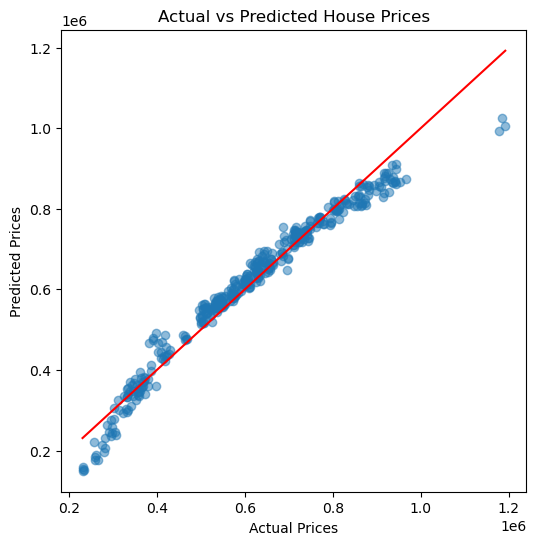

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.show()

In [47]:
# The scatter plot shows a strong linear relationship between actual and predicted house prices, confirming that the regression model performs well.

In [50]:
import pickle

with open("house_price_model.pkl", "wb") as f:
    pickle.dump(model, f)
